In [1]:
import os
import json
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

In [2]:
folder_path = r"C:\Users\jaske\Downloads\rpc_api_data"
files = [f for f in os.listdir(folder_path) if f.endswith(".json")]
print(files)

['842509.json', '842510.json', '842511.json', '842512.json', '842513.json', '842514.json', '842515.json', '842516.json', '842517.json', '842518.json', '842519.json', '842520.json', '842521.json', '842522.json', '842523.json', '842524.json', '842525.json', '842526.json', '842527.json', '842528.json', '842529.json', '842531.json', '842532.json', '842534.json', '842535.json', '842536.json', '842537.json', '842538.json', '842539.json', '842540.json', '842541.json', '842542.json', '842543.json', '842544.json', '842545.json', '842546.json', '842547.json', '842548.json', '842549.json', '842550.json', '842551.json', '842552.json', '842553.json', '842554.json', '842555.json', '842556.json', '842557.json', '842558.json', '842559.json', '842560.json', '842561.json', '842562.json', '842563.json', '842565.json', '842566.json', '842567.json', '842568.json', '842570.json', '842571.json', '842572.json', '842573.json', '842574.json', '842575.json', '842576.json', '842577.json', '842578.json', '842579.j

In [3]:
transaction_values = []

for file in files[:4]:
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r") as json_file:
        json_data = json.load(json_file)
        for transaction in json_data["transactions"]:
            transaction_values.append(float(transaction["total_bitcoin_transacted"]))

In [4]:
mean = np.mean(transaction_values)
std = np.std(transaction_values)

In [5]:
new_transactions = []
file_path = os.path.join(folder_path, files[4])
with open(file_path, "r") as json_file:
    json_data = json.load(json_file)
    for transaction in json_data["transactions"]:
        new_transactions.append(float(transaction["total_bitcoin_transacted"]))

def calculate_z_scores(data):
    z_scores = (data - mean) / std
    return z_scores

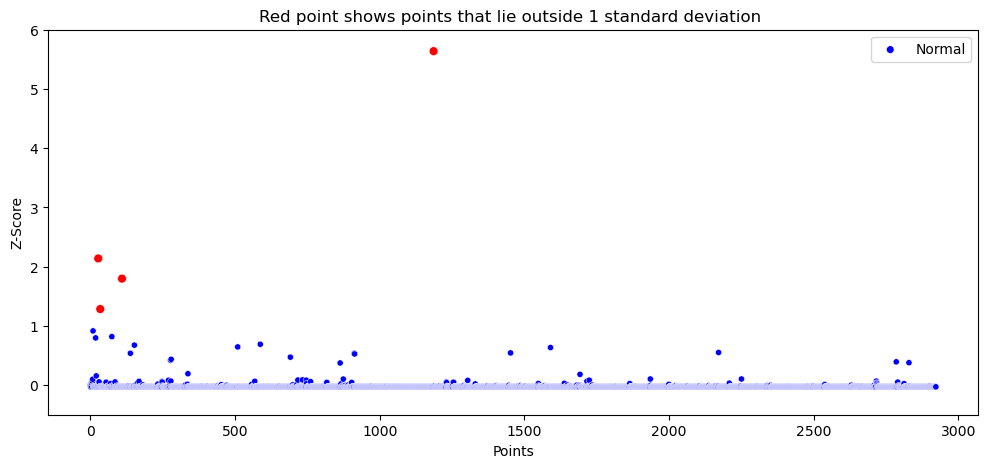

In [6]:
labels = ['Outlier' if score > 1 else 'Normal' for score in list(map(calculate_z_scores, new_transactions))]

plt.figure(figsize=(12,5))
sns.scatterplot(x=range(len(new_transactions)), y=list(map(calculate_z_scores, new_transactions)),
                s = [40 if score > 1 else 20 for score in list(map(calculate_z_scores, new_transactions))],
                color = ['red' if score > 1 else 'blue' for score in list(map(calculate_z_scores, new_transactions))])

plt.ylim(-0.5, 6)
plt.title("Red point shows points that lie outside 1 standard deviation ")
plt.xlabel("Points")
plt.ylabel("Z-Score")
plt.legend(["Normal", "Outlier"])
plt.show()

C:\Users\jaske\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


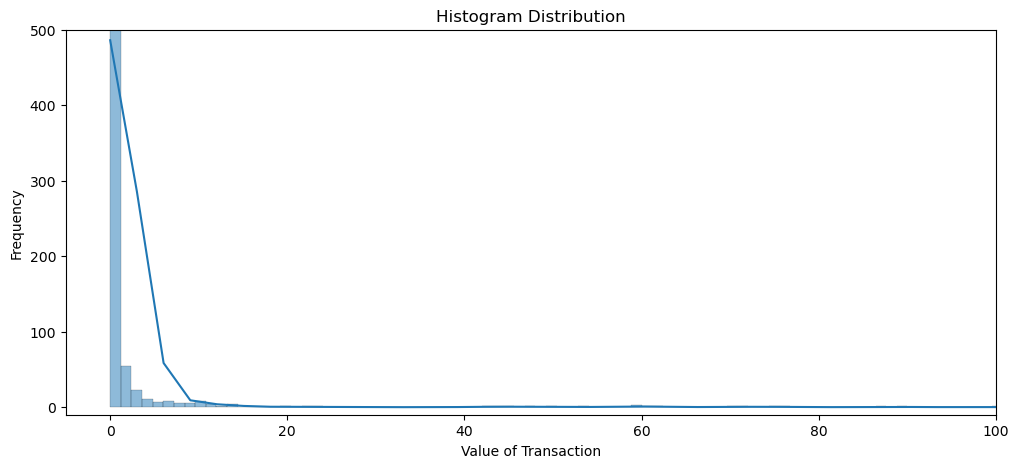

In [7]:
# Plot a histogram
plt.figure(figsize=(12, 5))
sns.histplot(new_transactions, bins = 500, kde=True)
plt.title('Histogram Distribution')
plt.xlabel('Value of Transaction')
plt.ylabel('Frequency')
plt.xlim(-5, 100)
plt.ylim(-10, 500)
plt.show()

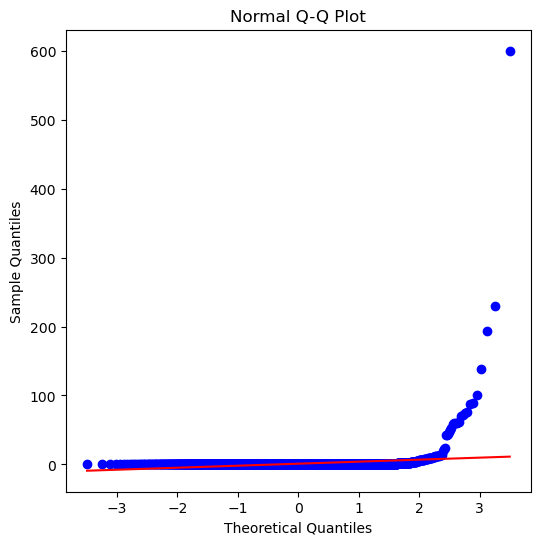

In [8]:
## Plot a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(sorted(new_transactions), dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [9]:
train_df = pd.DataFrame(columns=["txid", "value", "fee", "in_degree", "nu_out_degree", "influence"])

for file in files[:4]:
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r") as json_file:
        json_data = json.load(json_file)
        for transaction in json_data["transactions"][1:]:
            train_df = train_df._append({"txid": transaction["txid"], "value": float(transaction["receiver_total_received"]), "fee": float(transaction["fee"]),
            "in_degree": transaction["in_degree"], "nu_out_degree": transaction["nu_out_degree"],
            "influence": transaction["in_degree"] / (transaction["in_degree"] + transaction["nu_out_degree"])}, 
                                ignore_index=True)
train_df

C:\Users\jaske\AppData\Local\Temp\ipykernel_7812\1458075127.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = train_df._append({"txid": transaction["txid"], "value": float(transaction["receiver_total_received"]), "fee": float(transaction["fee"]),


,txid,value,fee,in_degree,nu_out_degree,influence
0,9b59598a3a6b5bfb6f117d78c487f2a0212cb48d16552d...,0.001999,0.000183,4,0,1.000000
1,84f73229ba38dd124d2343c6d48736c61b348ae3b284d3...,0.003455,0.000302,7,0,1.000000
2,af9b1ca3492cb92f1d5acf29de2fa020a518481396bb97...,0.003572,0.000029,1,0,1.000000
3,9dcbe48bad32a9ddc6b3f2ce129372f75757a7a4348279...,0.001168,0.000056,2,1,0.666667
4,7dc50558372b4113ca4bddb99aeed3e5a67af423ac8650...,0.000063,0.000042,2,0,1.000000
...,...,...,...,...,...,...
13460,010388f99a0efc8b8b524be3fe01839c09762fad8434bf...,0.043632,0.000736,24,0,1.000000
13461,ba3d78a95d70e0474c942735cf758624dfb59107badef0...,0.003580,0.000349,15,0,1.000000
13462,ea76d4d8ac25cbe4439250a5b46b02284facb0f1bb2045...,0.396116,0.000051,1,1,0.500000
13463,1c93d5f824c325f9d34d23754f7e19a767eb3a147898fb...,0.395200,0.000078,1,0,1.000000


In [10]:
df = pd.DataFrame(columns=["txid", "value", "fee", "in_degree", "nu_out_degree", "influence"])

file_path = os.path.join(folder_path, files[4])
with open(file_path, "r") as json_file:
    json_data = json.load(json_file)
    for transaction in json_data["transactions"][1:]:
        df = df._append({"txid": transaction["txid"], "value": float(transaction["receiver_total_received"]), "fee": float(transaction["fee"]),
            "in_degree": transaction["in_degree"], "nu_out_degree": transaction["nu_out_degree"],
            "influence": transaction["in_degree"] / (transaction["in_degree"] + transaction["nu_out_degree"])}, 
                                ignore_index=True)
df

C:\Users\jaske\AppData\Local\Temp\ipykernel_7812\517294811.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"txid": transaction["txid"], "value": float(transaction["receiver_total_received"]), "fee": float(transaction["fee"]),


,txid,value,fee,in_degree,nu_out_degree,influence
0,41fbb856dd22c7eb020eb1a7907a8cbf149882155c3b87...,0.000003,0.000022,1,0,1.000000
1,21dd2a9bf9ea012fe8d61d1a39aaf6aab9dc424b5142a4...,4.003492,0.000073,1,0,1.000000
2,5e699e357f7f0bb6f88ec700791cd2be2bc52e100d6d82...,1.310069,0.000081,1,0,1.000000
3,bb08343ec153b3e475717c476a29ff4e4feb48d51ec238...,6.906646,0.000048,1,1,0.500000
4,3de2e348ebbe4997883fa28bab02740eb97e983b62fc12...,6.398541,0.001459,1,1,0.500000
...,...,...,...,...,...,...
2917,9009b4706377ea37349169c66bbeda1d9284d4a5079ca4...,0.006368,0.000173,2,1,0.666667
2918,0675eb4f333f49ed3004f5a61db4e225020e2dfb983819...,0.446647,0.000177,6,0,1.000000
2919,382c15b662e58ef8c0da8a3bea09e996f727c1f84ee1d4...,0.000666,0.000071,2,0,1.000000
2920,d9cef6ce102c023b4b4c998924304d44771bf0f2fcb332...,0.011101,0.000031,1,1,0.500000


In [11]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
iso_forest.fit(train_df[["value", "fee", "in_degree", "nu_out_degree", "influence"]])

outliers = iso_forest.predict(df[["value", "fee", "in_degree", "nu_out_degree", "influence"]])
df["outlier"] = outliers

anomalies = df[df["outlier"] == -1]
print(anomalies)

                                                   txid       value       fee  \
8     02da6ae40de75526f561b0ef1681938a6198cc59d77831...   99.995041  0.004959   
26    0ecce7787e499dabc30a29df950f8a3ca940a4684d04c9...  229.550806  0.000606   
470   99faa244455b358e578981b4709f19fbd4c347f2699957...    2.952279  0.000480   
1185  b11c02163b70665951e4db0291de820ea135c17cf16232...  600.062117  0.006873   
1690  5597995f207957303032519489bcfe6c1743add074f7db...    0.059483  0.004300   
2338  195cb233edcc80b4af05f14d4f060205c5b3f0346a6d43...    2.319023  0.002605   
2499  fbaf0acf52adab802a2f223e0c2df180ba6bfd440dd18b...    1.636092  0.001192   
2800  310fb1f13745cb16cb76fb462879e6f11bfc8bb3b8ef39...    0.723208  0.001122   
2834  b458e23c6dc472f55864118fcfdd79d0064adccc1741f9...    1.436147  0.000539   

     in_degree nu_out_degree  influence  outlier  
8            1             0   1.000000       -1  
26          11             1   0.916667       -1  
470          1             7   0.125

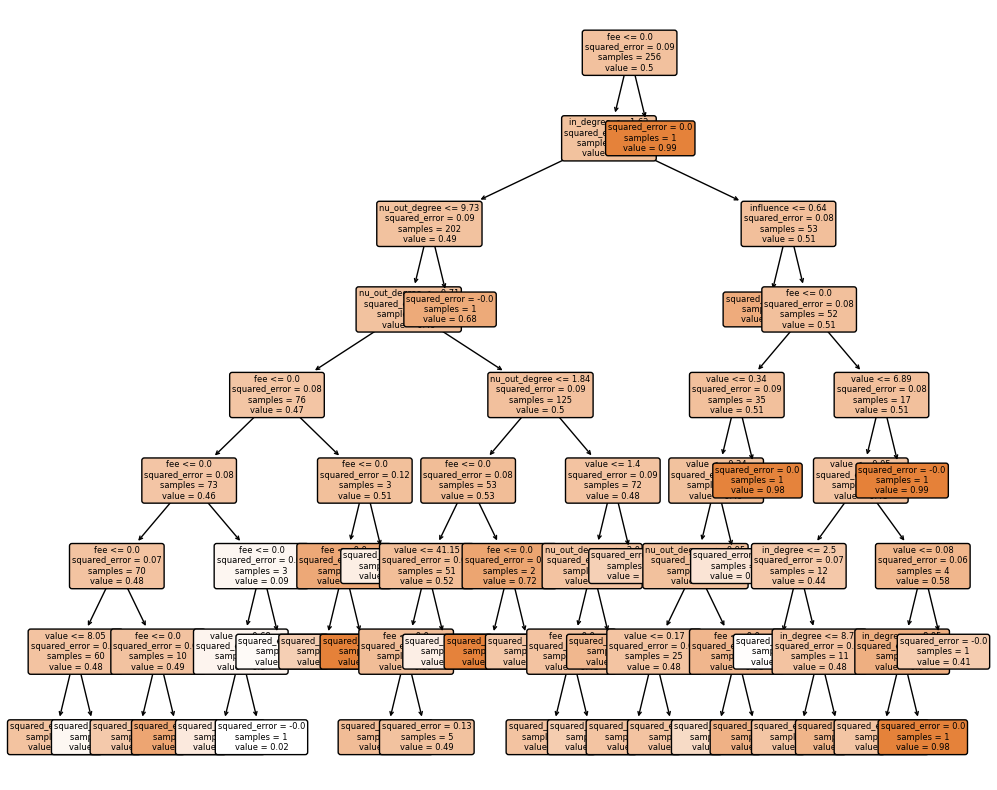

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = iso_forest.estimators_[55]

plt.figure(figsize=(12, 10))
plot_tree(tree, feature_names=["value", "fee", "in_degree", "nu_out_degree", "influence"], filled=True, rounded=True, precision=2, fontsize=6)
plt.show()